## Logistic Regression
is a statistical technique capable of predicting a binary outcome. It's a well-known strategy, widely used in disciplines ranging from credit and finance to medicine to criminology and other social sciences. Logistic regression is fairly intuitive and very effective

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables
The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
- age: woman's age
- yrs_married: number of years married
- children: number of children
- religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
- educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
- occupation_husb: husband's occupation (same coding as above)
- affairs: time spent in extra-marital affairs

# Problem Statement
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

Skipper Seabold, one of the primary contributors to Statsmodels, did a similar classification in his Statsmodels demo at a Statistical Programming DC Meetup. However, he used Statsmodels for the classification (whereas I'm using scikit-learn), and he treated the occupation variables as continuous (whereas I'm treating them as categorical).

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc

In [10]:
data = pd.read_csv('Affairs.csv')
X = data[['rate_marriage', 'age', 'yrs_married','children','religious','educ','occupation','occupation_husb']]
y = data.affair
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [11]:
# logistic regression model
model = LogisticRegression()
model = model.fit(X_train, y_train)
Y_test = model.predict(X_test)
explained_variance = model.score(X_test,y_test)
print("R^2: {}".format(explained_variance))

R^2: 0.7417582417582418


In [12]:
# what percentage had affairs?
y.mean()
# Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

0.3224945020420987

# Model Evaluation Using a Validation Set

In [13]:
print("Estimated coefficients for the logistic regression : {}".format(model.coef_))
# Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 
# For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the 
# baseline occupation (student), since all of the dummy coefficients are positive.

Estimated coefficients for the logistic regression : [[ -6.87490863e-01  -4.93898378e-02   1.04204157e-01  -1.34327730e-02
   -3.68353508e-01  -3.18394055e-02   1.70001226e-01   5.68151999e-04]]


In [14]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
# generate class probabilities
probs = model.predict_proba(X_test)
print(probs)
Y_test = model.predict(X_test)

[[ 0.38585625  0.61414375]
 [ 0.92283519  0.07716481]
 [ 0.68072983  0.31927017]
 ..., 
 [ 0.53451668  0.46548332]
 [ 0.80407938  0.19592062]
 [ 0.77313855  0.22686145]]


In [26]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, jaccard_similarity_score, roc_auc_score

ev = explained_variance_score(y_test, Y_test, multioutput='uniform_average')
# Best possible score is 1.0, lower values are worse.
print("Explained Variance Score: {}". format(ev))

mae = mean_absolute_error(y_test, Y_test, multioutput='uniform_average')
# MAE output is non-negative floating point. The best value is 0.0.
print("Mean Absolute Error: {}".format(mae))

mse = mean_squared_error(y_test, Y_test, multioutput='uniform_average')
# MAE output is non-negative floating point. The best value is 0.0.
print("Mean Squared Error: {}".format(mse))

r2 = r2_score(y_test, Y_test)
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always 
# predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
print("R - Squared value: {}".format(r2))

print('What percent of predictions are same: {}'.format(jaccard_similarity_score(y_test, Y_test)))

Explained Variance Score: -0.1588628952828417
Mean Absolute Error: 0.2696335078534031
Mean Squared Error: 0.2696335078534031
R - Squared value: -0.24367667567304485
What percent of predictions are same: 0.7303664921465969


In [16]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, Y_test))
print(metrics.classification_report(y_test, Y_test))

[[1175  128]
 [ 387  220]]
             precision    recall  f1-score   support

          0       0.75      0.90      0.82      1303
          1       0.63      0.36      0.46       607

avg / total       0.71      0.73      0.71      1910



In [27]:
actual = y_train
predictions = model.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area Under the curve is: {}".format(roc_auc))

Area Under the curve is: 0.623680631183285


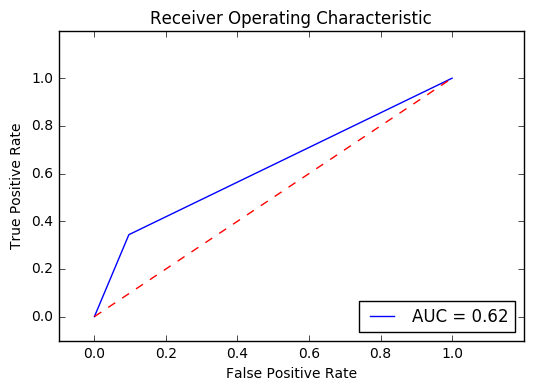

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.71630094  0.69749216  0.74137931  0.71226415  0.70125786  0.73113208
  0.71855346  0.70125786  0.74842767  0.75314465]
0.722121014964
